# Answer 1:

Wine Quality Data Set

This is one of the most popular datasets along data science beginners.It is divided into 2 datasets. There are 4898
rows and 12 columns in this dataset.
Read the data from https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

# Answer 2:

From the above dataset, the objective of this project is to develop a Data Centric ML Model through which the Quality 
of WINE can be predicted.

# Identifying Last Two digit for the Assignment Guideline

In [1]:
id = 20216039
print('My Id is:', id, '.','The last digit of my ID is:', str(id)[-2:])
Mod = 39%2
print('The Modulo of the last two digit of my ID is', Mod, '.', '\nMy assignment Dataset is Wine Quality Data.')

My Id is: 20216039 . The last digit of my ID is: 39
The Modulo of the last two digit of my ID is 1 . 
My assignment Dataset is Wine Quality Data.


# Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib as mt
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
df=pd.read_csv('winedata.csv', sep=',')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2037 entries, 0 to 2036
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         2037 non-null   float64
 1   volatile.acidity      2037 non-null   float64
 2   citric.acid           2037 non-null   float64
 3   residual.sugar        2037 non-null   float64
 4   chlorides             2037 non-null   float64
 5   free.sulfur.dioxide   2037 non-null   float64
 6   total.sulfur.dioxide  2037 non-null   float64
 7   density               2037 non-null   float64
 8   pH                    2037 non-null   float64
 9   sulphates             2037 non-null   float64
 10  alcohol               2037 non-null   float64
 11  quality               2037 non-null   int64  
 12  rt.sulfur.dioxide     2037 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 207.0 KB


In [4]:
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,rt.sulfur.dioxide
0,7.5,0.33,0.32,11.1,0.036,25.0,119.0,0.99620,3.15,0.34,10.5,6,5.000000
1,6.3,0.27,0.29,12.2,0.044,59.0,196.0,0.99782,3.14,0.40,8.8,6,7.681146
2,7.0,0.30,0.51,13.6,0.050,40.0,168.0,0.99760,3.07,0.52,9.6,7,6.324555
3,7.4,0.38,0.27,7.5,0.041,24.0,160.0,0.99535,3.17,0.43,10.0,5,4.898979
4,8.1,0.12,0.38,0.9,0.034,36.0,86.0,0.99026,2.80,0.55,12.0,6,6.000000


# Answer 3:

# Necessity of Dropping rt.sulfur.dioxide (As Assignment guideline provides 12 Columns & The Dataset Contains 13 Columns)

In [5]:
df.drop(['rt.sulfur.dioxide'], axis =1, inplace =True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2037 entries, 0 to 2036
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         2037 non-null   float64
 1   volatile.acidity      2037 non-null   float64
 2   citric.acid           2037 non-null   float64
 3   residual.sugar        2037 non-null   float64
 4   chlorides             2037 non-null   float64
 5   free.sulfur.dioxide   2037 non-null   float64
 6   total.sulfur.dioxide  2037 non-null   float64
 7   density               2037 non-null   float64
 8   pH                    2037 non-null   float64
 9   sulphates             2037 non-null   float64
 10  alcohol               2037 non-null   float64
 11  quality               2037 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 191.1 KB


# Appending Dataset According to the Assignment Guideline

In [7]:
# List of data series
datarowsSeries = [pd.Series([7.8+.39,.88+.39,0.00+.39,1.9,0.09+.39,25.0+.39,67.0+.39,.991+.39,3.22,0.68+.39,9.8+.39,5], index=df.columns ), pd.Series([7.2+.39,.83+.39,0.01+.39,2.2,0.19+.39,15.0+.39,60.0+.39,.996+.39,3.52,0.55+.39,9.6+.39,6], index=df.columns ), pd.Series([7.9+.39,.89+.39,0.01+.39,1.7,0.08+.39,22.0+.39,57.0+.39,.997+.39,3.26,0.64+.39,9.8+.39,2], index=df.columns ), pd.Series([7.7+.39,.86+.39,0.02+.39,2.3,0.07+.39,11.0+.39,38.0+.39,.994+.39,3.12,0.08+.39,9.4+.39,3], index=df.columns ) ]

# Check The DF For Verifying Newly Appended Data

In [8]:
df.iloc[-4:]

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
2033,7.4,0.19,0.31,14.5,0.045,39.0,193.0,0.99860,3.10,0.50,9.2,6
2034,6.7,0.36,0.26,7.9,0.034,39.0,123.0,0.99119,2.99,0.30,12.2,7
2035,7.7,0.28,0.35,15.3,0.056,31.0,117.0,0.99980,3.27,0.50,9.6,5
2036,5.7,0.22,0.28,1.3,0.027,26.0,101.0,0.98948,3.35,0.38,12.5,7


# New Appended DF named new_data

In [9]:
new_data = df.append(datarowsSeries, ignore_index=True)

In [10]:
new_data.iloc[-8:]


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
2033,7.40,0.19,0.31,14.5,0.045,39.00,193.00,0.99860,3.10,0.50,9.20,6.0
2034,6.70,0.36,0.26,7.9,0.034,39.00,123.00,0.99119,2.99,0.30,12.20,7.0
2035,7.70,0.28,0.35,15.3,0.056,31.00,117.00,0.99980,3.27,0.50,9.60,5.0
2036,5.70,0.22,0.28,1.3,0.027,26.00,101.00,0.98948,3.35,0.38,12.50,7.0
2037,8.19,1.27,0.39,1.9,0.480,25.39,67.39,1.38100,3.22,1.07,10.19,5.0
2038,7.59,1.22,0.40,2.2,0.580,15.39,60.39,1.38600,3.52,0.94,9.99,6.0
2039,8.29,1.28,0.40,1.7,0.470,22.39,57.39,1.38700,3.26,1.03,10.19,2.0
2040,8.09,1.25,0.41,2.3,0.460,11.39,38.39,1.38400,3.12,0.47,9.79,3.0


In [11]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2041 entries, 0 to 2040
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         2041 non-null   float64
 1   volatile.acidity      2041 non-null   float64
 2   citric.acid           2041 non-null   float64
 3   residual.sugar        2041 non-null   float64
 4   chlorides             2041 non-null   float64
 5   free.sulfur.dioxide   2041 non-null   float64
 6   total.sulfur.dioxide  2041 non-null   float64
 7   density               2041 non-null   float64
 8   pH                    2041 non-null   float64
 9   sulphates             2041 non-null   float64
 10  alcohol               2041 non-null   float64
 11  quality               2041 non-null   float64
dtypes: float64(12)
memory usage: 191.5 KB


# Changed Column Name for Ease

In [12]:
new_data.columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'   ]

In [13]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2041 entries, 0 to 2040
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         2041 non-null   float64
 1   volatile_acidity      2041 non-null   float64
 2   citric_acid           2041 non-null   float64
 3   residual_sugar        2041 non-null   float64
 4   chlorides             2041 non-null   float64
 5   free_sulfur_dioxide   2041 non-null   float64
 6   total_sulfur_dioxide  2041 non-null   float64
 7   density               2041 non-null   float64
 8   pH                    2041 non-null   float64
 9   sulphates             2041 non-null   float64
 10  alcohol               2041 non-null   float64
 11  quality               2041 non-null   float64
dtypes: float64(12)
memory usage: 191.5 KB


# Answer 4:

# Suitable Plotting, Data Visualization

<AxesSubplot:>

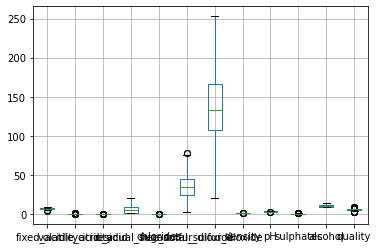

In [14]:
new_data.boxplot()

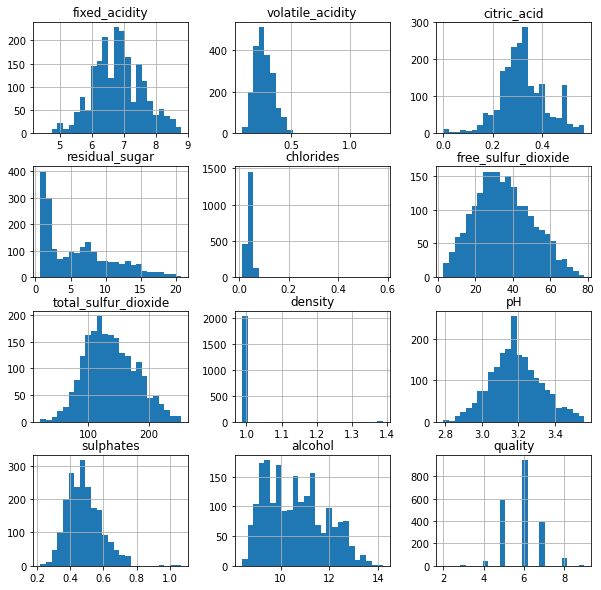

In [15]:
new_data.hist(bins=25,figsize=(10,10))
# display histogram
plt.show()

# Checked Specific Column for Better Visualization & Outlier Removal

<AxesSubplot:>

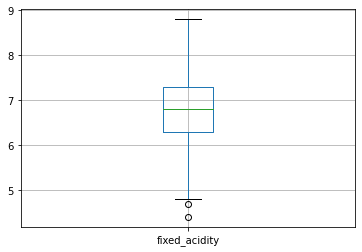

In [16]:
new_data.boxplot('fixed_acidity')

# Found Outlier in The fixed_acidity Column. Found IQR To Remove The outlier.

In [17]:
#Finding IQR for the removal of outliers of the values of fixed|_acidity column
sort_data = np.sort(new_data['fixed_acidity'])
Q1 = np.percentile(new_data['fixed_acidity'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(new_data['fixed_acidity'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 
print(IQR)

1.0


In [18]:
low_lim = Q1 - 1.5*IQR 
up_lim = Q3 + 1.5*IQR 
# Printing Results
print('Low_limit is:', low_lim )
print('Upper limit is:', up_lim)
print('Q1:', Q1)
print('Q3:', Q3)

Low_limit is: 4.8
Upper limit is: 8.8
Q1: 6.3
Q3: 7.3


In [19]:
outliers = new_data.fixed_acidity[(new_data.fixed_acidity >= up_lim) | (new_data.fixed_acidity <= low_lim )]
print(outliers)


313     8.8
425     8.8
798     8.8
839     4.8
879     8.8
1051    4.4
1205    8.8
1275    8.8
1288    4.8
1324    8.8
1496    4.8
1597    8.8
1736    4.8
1838    4.7
2016    4.8
Name: fixed_acidity, dtype: float64


In [20]:
new_data.shape 

(2041, 12)

# Dropping outliers for fixed_acidity Column

In [21]:
#dropping the outliers
new_data.drop(new_data[new_data['fixed_acidity']>= 8.8].index, inplace = True)
new_data.shape 

(2033, 12)

In [22]:
#dropping the outliers
new_data.drop(new_data[new_data['fixed_acidity']<= 4.8].index, inplace = True)
new_data.shape 

(2026, 12)

# Verifying the fixed_acidity Boxplot again to be sure about Outlier Removal

<AxesSubplot:>

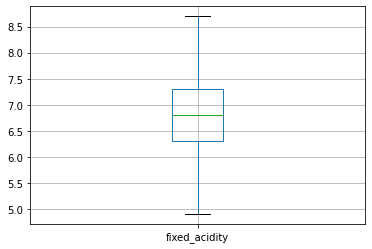

In [23]:
new_data.boxplot('fixed_acidity')

# Everything is OK. Proceed to Next Outlier Removal for other columns.

# Steps for volatile_acidity Column

<AxesSubplot:>

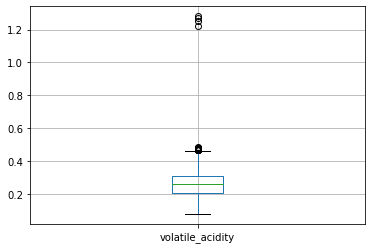

In [24]:
new_data.boxplot('volatile_acidity')

In [25]:
#Finding IQR for the removal of outliers of the values of volatile_acidity column
sort_data = np.sort(new_data['volatile_acidity'])
Q1 = np.percentile(new_data['volatile_acidity'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(new_data['volatile_acidity'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 
print(IQR)

0.1


In [26]:
low_lim = Q1 - 1.5*IQR 
up_lim = Q3 + 1.5*IQR 
# Printing Results
print('Low_limit is:', low_lim )
print('Upper limit is:', up_lim)
print('Q1:', Q1)
print('Q3:', Q3)

Low_limit is: 0.05999999999999997
Upper limit is: 0.46
Q1: 0.21
Q3: 0.31


In [27]:
outliers = new_data.volatile_acidity[(new_data.volatile_acidity >= up_lim) | (new_data.volatile_acidity <= low_lim )]
print(outliers)

99      0.470
162     0.460
204     0.460
237     0.480
456     0.470
483     0.460
491     0.470
498     0.460
499     0.485
602     0.460
634     0.460
742     0.470
842     0.460
845     0.475
854     0.460
860     0.480
1010    0.460
1029    0.480
1122    0.480
1312    0.460
1340    0.460
1378    0.480
1380    0.470
1412    0.460
1455    0.460
1529    0.460
1668    0.460
1696    0.480
1710    0.480
1852    0.480
1864    0.480
1877    0.470
1892    0.460
1969    0.460
2037    1.270
2038    1.220
2039    1.280
2040    1.250
Name: volatile_acidity, dtype: float64


In [28]:
new_data.shape 

(2026, 12)

In [29]:
#dropping the outliers
new_data.drop(new_data[new_data['volatile_acidity']>= 0.46].index, inplace = True)
new_data.shape 

(1988, 12)

In [30]:
#dropping the outliers
new_data.drop(new_data[new_data['volatile_acidity']<= 0.05999999999999997].index, inplace = True)
new_data.shape 

(1988, 12)

<AxesSubplot:>

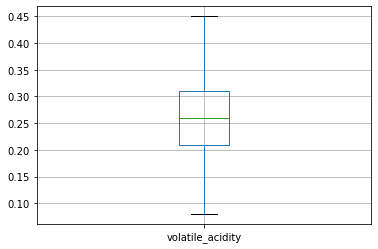

In [31]:
new_data.boxplot('volatile_acidity')

# Steps for citric_acid Column

<AxesSubplot:>

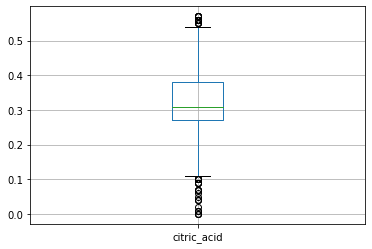

In [32]:
new_data.boxplot('citric_acid')

In [33]:
#Finding IQR for the removal of outliers of the values of citric_acid column
sort_data = np.sort(new_data['citric_acid'])
Q1 = np.percentile(new_data['citric_acid'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(new_data['citric_acid'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 
print(IQR)

0.10999999999999999


In [34]:
low_lim = Q1 - 1.5*IQR 
up_lim = Q3 + 1.5*IQR 
# Printing Results
print('Low_limit is:', low_lim )
print('Upper limit is:', up_lim)
print('Q1:', Q1)
print('Q3:', Q3)

Low_limit is: 0.10500000000000004
Upper limit is: 0.5449999999999999
Q1: 0.27
Q3: 0.38


In [35]:
outliers = new_data.citric_acid[(new_data.citric_acid >= up_lim) | (new_data.citric_acid <= low_lim )]
print(outliers)

82      0.07
131     0.56
135     0.00
194     0.07
222     0.56
239     0.10
247     0.55
257     0.56
266     0.09
294     0.56
356     0.07
376     0.10
404     0.56
426     0.02
445     0.55
676     0.07
698     0.06
717     0.56
865     0.10
1011    0.01
1076    0.01
1094    0.57
1114    0.57
1242    0.04
1260    0.01
1262    0.57
1263    0.56
1277    0.00
1310    0.10
1346    0.09
1368    0.55
1370    0.56
1371    0.04
1395    0.05
1463    0.57
1470    0.10
1517    0.55
1544    0.56
1571    0.56
1596    0.10
1623    0.00
1666    0.57
1708    0.56
1800    0.09
1813    0.56
1826    0.09
1867    0.04
1933    0.56
Name: citric_acid, dtype: float64


In [36]:
new_data.shape 

(1988, 12)

In [37]:
#dropping the outliers
new_data.drop(new_data[new_data['citric_acid']>= 0.5449999999999999].index, inplace = True)
new_data.shape

(1966, 12)

In [38]:
#dropping the outliers
new_data.drop(new_data[new_data['citric_acid']<= 0.10500000000000004].index, inplace = True)
new_data.shape 

(1940, 12)

<AxesSubplot:>

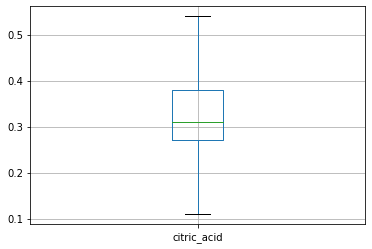

In [39]:
new_data.boxplot('citric_acid')

# Steps for residual_sugar Column. (No Outlier Found.) Continue to next Column.

<AxesSubplot:>

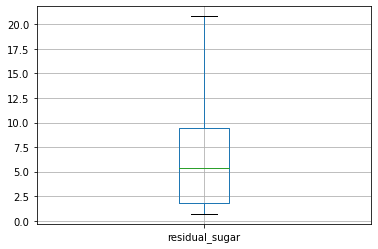

In [40]:
new_data.boxplot('residual_sugar')


# Steps for chlorides Column 

<AxesSubplot:>

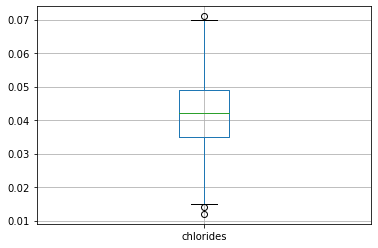

In [41]:
new_data.boxplot('chlorides')


In [42]:
#Finding IQR for the removal of outliers of the values of chlorides column
sort_data = np.sort(new_data['chlorides'])
Q1 = np.percentile(new_data['chlorides'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(new_data['chlorides'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 
print(IQR)

0.013999999999999999


In [43]:
low_lim = Q1 - 1.5*IQR 
up_lim = Q3 + 1.5*IQR 
# Printing Results
print('Low_limit is:', low_lim )
print('Upper limit is:', up_lim)
print('Q1:', Q1)
print('Q3:', Q3)

Low_limit is: 0.014000000000000005
Upper limit is: 0.07
Q1: 0.035
Q3: 0.049


In [44]:
outliers = new_data.citric_acid[(new_data.chlorides >= up_lim) | (new_data.chlorides <= low_lim )]
print(outliers)

92      0.27
117     0.28
400     0.41
542     0.30
1250    0.30
1444    0.30
1734    0.28
Name: citric_acid, dtype: float64


In [45]:
new_data.shape 

(1940, 12)

In [46]:
#dropping the outliers
new_data.drop(new_data[new_data['chlorides']>= 0.07].index, inplace = True)
new_data.shape

(1935, 12)

In [47]:
#dropping the outliers
new_data.drop(new_data[new_data['chlorides']<= 0.014000000000000005].index, inplace = True)
new_data.shape 

(1933, 12)

<AxesSubplot:>

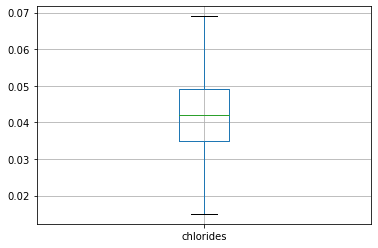

In [48]:
new_data.boxplot('chlorides')

# Steps for free_sulfur_dioxide Column

<AxesSubplot:>

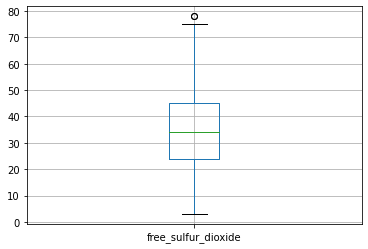

In [49]:
new_data.boxplot('free_sulfur_dioxide')

In [50]:
#Finding IQR for the removal of outliers of the values of free_sulfur_dioxide column
sort_data = np.sort(new_data['free_sulfur_dioxide'])
Q1 = np.percentile(new_data['free_sulfur_dioxide'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(new_data['free_sulfur_dioxide'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 
print(IQR)

21.0


In [51]:
low_lim = Q1 - 1.5*IQR 
up_lim = Q3 + 1.5*IQR 
# Printing Results
print('Low_limit is:', low_lim )
print('Upper limit is:', up_lim)
print('Q1:', Q1)
print('Q3:', Q3)

Low_limit is: -7.5
Upper limit is: 76.5
Q1: 24.0
Q3: 45.0


In [52]:
outliers = new_data.citric_acid[(new_data.free_sulfur_dioxide >= up_lim) | (new_data.free_sulfur_dioxide <= low_lim )]
print(outliers)

1618    0.48
1931    0.50
Name: citric_acid, dtype: float64


In [53]:
new_data.shape 

(1933, 12)

In [54]:
#dropping the outliers
new_data.drop(new_data[new_data['free_sulfur_dioxide']>= 76.5].index, inplace = True)
new_data.shape

(1931, 12)

In [55]:
#dropping the outliers
new_data.drop(new_data[new_data['free_sulfur_dioxide']<= -7.55].index, inplace = True)
new_data.shape 

(1931, 12)

<AxesSubplot:>

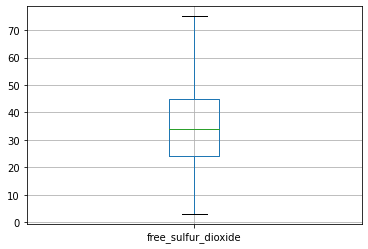

In [56]:
new_data.boxplot('free_sulfur_dioxide')

# Steps for total_sulfur_dioxide Column . (No Outlier Found.) Continue to next Column.

<AxesSubplot:>

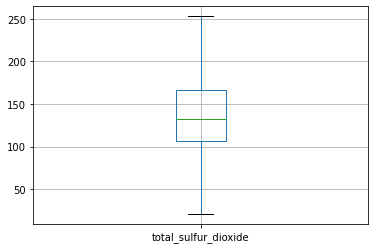

In [57]:
new_data.boxplot('total_sulfur_dioxide')

# Steps for density Column. (No Outlier Found.) Continue to next Column.

<AxesSubplot:>

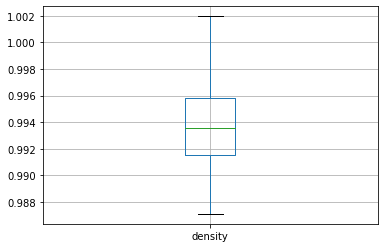

In [58]:
new_data.boxplot('density')

# Steps for pH Column

<AxesSubplot:>

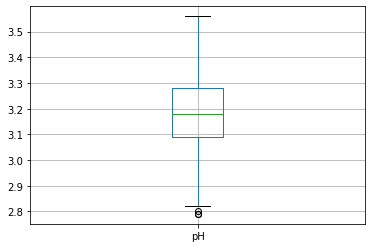

In [59]:
new_data.boxplot('pH')

In [60]:
 #Finding IQR for the removal of outliers of the values of pH column
sort_data = np.sort(new_data['pH'])
Q1 = np.percentile(new_data['pH'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(new_data['pH'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 
print(IQR)

0.18999999999999995


In [61]:
low_lim = Q1 - 1.5*IQR 
up_lim = Q3 + 1.5*IQR 
# Printing Results
print('Low_limit is:', low_lim )
print('Upper limit is:', up_lim)
print('Q1:', Q1)
print('Q3:', Q3)

Low_limit is: 2.8049999999999997
Upper limit is: 3.5649999999999995
Q1: 3.09
Q3: 3.28


In [62]:
outliers = new_data.pH[(new_data.pH >= up_lim) | (new_data.pH <= low_lim )]
print(outliers)

4      2.80
133    2.79
747    2.79
Name: pH, dtype: float64


In [63]:
new_data.shape 

(1931, 12)

In [64]:
#dropping the outliers
new_data.drop(new_data[new_data['pH']>= 3.5649999999999995].index, inplace = True)
new_data.shape

(1931, 12)

In [65]:
#dropping the outliers
new_data.drop(new_data[new_data['pH']<= 2.8049999999999997].index, inplace = True)
new_data.shape 

(1928, 12)

<AxesSubplot:>

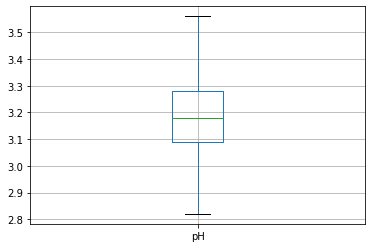

In [66]:
new_data.boxplot('pH')

# Steps for sulphates Column

<AxesSubplot:>

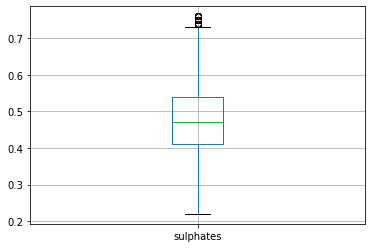

In [67]:
new_data.boxplot('sulphates')

In [68]:
 #Finding IQR for the removal of outliers of the values of sulphates column
sort_data = np.sort(new_data['sulphates'])
Q1 = np.percentile(new_data['sulphates'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(new_data['sulphates'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 
print(IQR)

0.13000000000000006


In [69]:
low_lim = Q1 - 1.5*IQR 
up_lim = Q3 + 1.5*IQR 
# Printing Results
print('Low_limit is:', low_lim )
print('Upper limit is:', up_lim)
print('Q1:', Q1)
print('Q3:', Q3)

Low_limit is: 0.21499999999999989
Upper limit is: 0.7350000000000001
Q1: 0.41
Q3: 0.54


In [70]:
outliers = new_data.sulphates[(new_data.sulphates >= up_lim) | (new_data.sulphates <= low_lim )]
print(outliers)

70      0.75
157     0.75
241     0.74
420     0.75
741     0.75
824     0.76
947     0.75
1152    0.76
1230    0.75
1266    0.76
1292    0.76
1298    0.74
1337    0.74
1350    0.75
1471    0.75
1521    0.75
1549    0.74
1651    0.74
1748    0.75
1818    0.74
1875    0.76
1889    0.75
1943    0.76
Name: sulphates, dtype: float64


In [71]:
new_data.shape 

(1928, 12)

In [72]:
#dropping the outliers
new_data.drop(new_data[new_data['sulphates']>= 0.7350000000000001].index, inplace = True)
new_data.shape

(1905, 12)

In [73]:
#dropping the outliers
new_data.drop(new_data[new_data['sulphates']<= 0.21499999999999989].index, inplace = True)
new_data.shape

(1905, 12)

<AxesSubplot:>

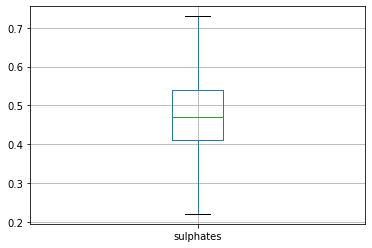

In [74]:
new_data.boxplot('sulphates')

# Steps for alcohol Column. (No Outlier Found.) Continue to next Column.

<AxesSubplot:>

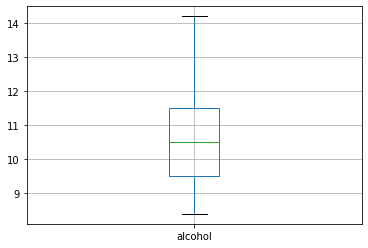

In [75]:
new_data.boxplot('alcohol')

# Exploring the Processed Dataset

In [76]:
# Now, let's check the information about different variables/column from the dataset:
new_data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000
mean,6.833648,0.262341,0.325160,6.329318,0.042202,34.806562,137.456693,0.993821,3.186084,0.478688,10.607855,5.938583
std,0.732781,0.072038,0.085372,4.862617,0.009813,15.096251,41.334985,0.002863,0.136701,0.094667,1.225370,0.840735
min,4.900000,0.080000,0.110000,0.700000,0.015000,3.000000,21.000000,0.987110,2.820000,0.220000,8.400000,3.000000
25%,6.300000,0.210000,0.270000,1.800000,0.035000,24.000000,107.000000,0.991520,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.310000,5.400000,0.042000,34.000000,133.000000,0.993550,3.180000,0.470000,10.500000,6.000000
75%,7.300000,0.310000,0.370000,9.300000,0.049000,45.000000,166.000000,0.995800,3.280000,0.540000,11.500000,6.000000
max,8.700000,0.450000,0.540000,20.800000,0.069000,75.000000,253.000000,1.001960,3.560000,0.730000,14.200000,9.000000


In [77]:
new_data.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Exploring the Target Variable (Data of quality Column)

In [78]:
new_data.quality.value_counts().sort_index()

3.0      3
4.0     37
5.0    533
6.0    902
7.0    365
8.0     61
9.0      4
Name: quality, dtype: int64

In [79]:
new_data['quality'].unique()

array([6., 7., 5., 4., 8., 9., 3.])

In [80]:
new_data['quality']

0       6.0
1       6.0
2       7.0
3       5.0
5       7.0
       ... 
2032    6.0
2033    6.0
2034    7.0
2035    5.0
2036    7.0
Name: quality, Length: 1905, dtype: float64

<AxesSubplot:xlabel='quality', ylabel='count'>

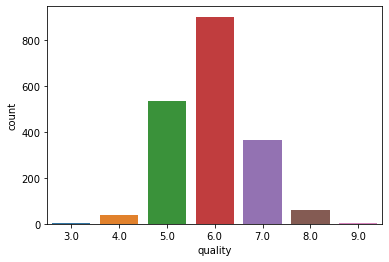

In [81]:
sns.countplot(x='quality', data=new_data)

In [82]:

new_data['quality'].value_counts()



6.0    902
5.0    533
7.0    365
8.0     61
4.0     37
9.0      4
3.0      3
Name: quality, dtype: int64

In [83]:
new_data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000
mean,6.833648,0.262341,0.325160,6.329318,0.042202,34.806562,137.456693,0.993821,3.186084,0.478688,10.607855,5.938583
std,0.732781,0.072038,0.085372,4.862617,0.009813,15.096251,41.334985,0.002863,0.136701,0.094667,1.225370,0.840735
min,4.900000,0.080000,0.110000,0.700000,0.015000,3.000000,21.000000,0.987110,2.820000,0.220000,8.400000,3.000000
25%,6.300000,0.210000,0.270000,1.800000,0.035000,24.000000,107.000000,0.991520,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.310000,5.400000,0.042000,34.000000,133.000000,0.993550,3.180000,0.470000,10.500000,6.000000
75%,7.300000,0.310000,0.370000,9.300000,0.049000,45.000000,166.000000,0.995800,3.280000,0.540000,11.500000,6.000000
max,8.700000,0.450000,0.540000,20.800000,0.069000,75.000000,253.000000,1.001960,3.560000,0.730000,14.200000,9.000000


# Bivariate Analysis (Checking the relationship of entities with Target Variable Quality)

# Fixed Acidity vs Quality

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


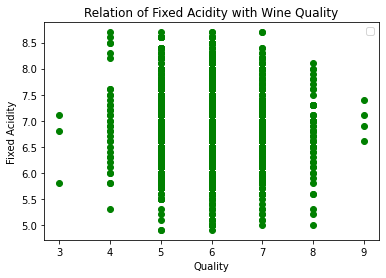

In [84]:
plt.scatter(new_data['quality'], new_data['fixed_acidity'], color = 'green')
plt.title('Relation of Fixed Acidity with Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Fixed Acidity')
plt.legend()
plt.show()

<AxesSubplot:xlabel='quality', ylabel='fixed_acidity'>

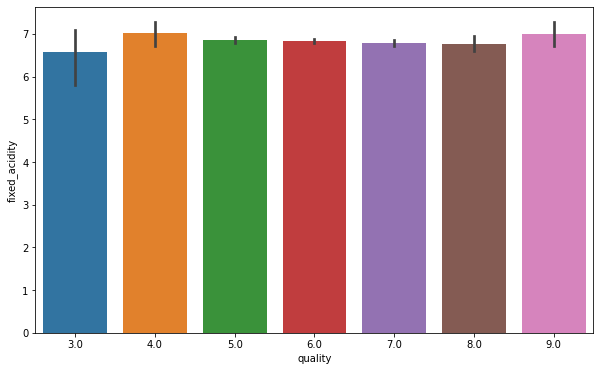

In [85]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed_acidity', data = new_data)

# Alcohol vs Quality

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


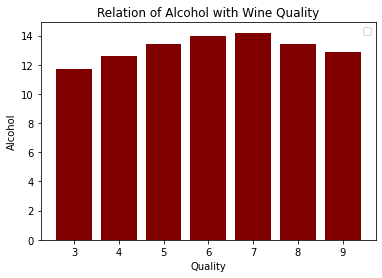

In [86]:
plt.bar(new_data['quality'], new_data['alcohol'], color = 'maroon')
plt.title('Relation of Alcohol with Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.legend()
plt.show()

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

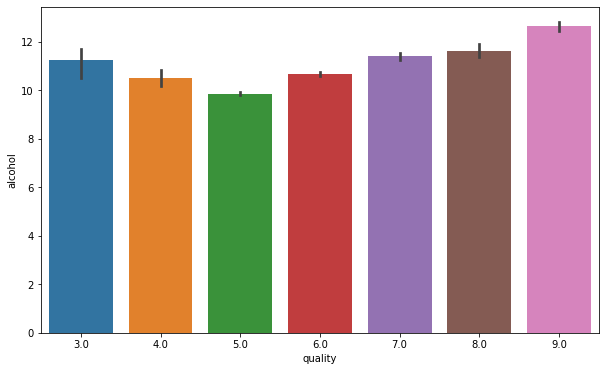

In [87]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = new_data)

# Volatile Acidity vs Quality

<AxesSubplot:xlabel='quality', ylabel='volatile_acidity'>

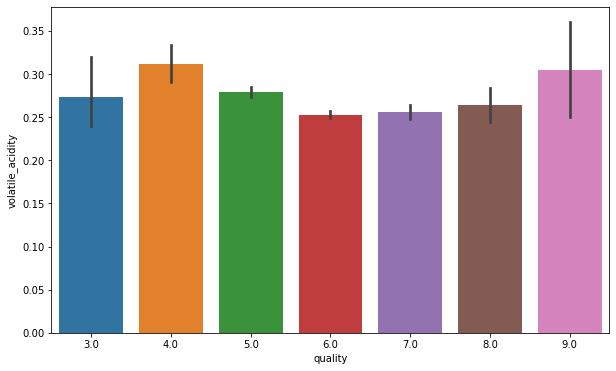

In [88]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile_acidity', data = new_data)

# Citric Acid vs Quality

<AxesSubplot:xlabel='quality', ylabel='citric_acid'>

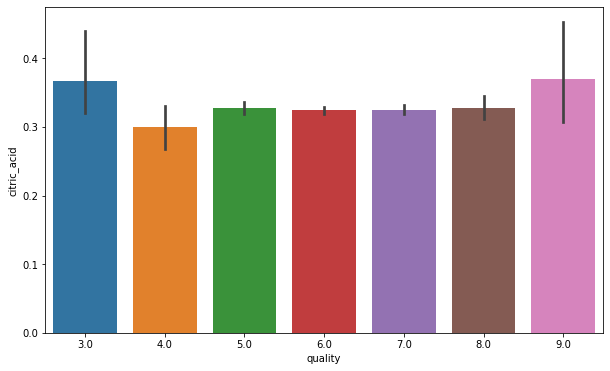

In [89]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric_acid', data = new_data)

# Residual Sugar vs Quality

<AxesSubplot:xlabel='quality', ylabel='residual_sugar'>

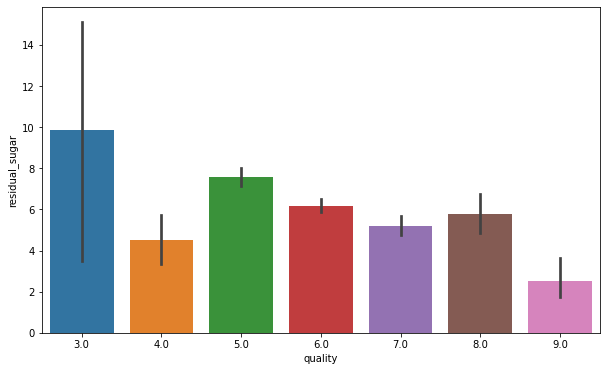

In [90]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual_sugar', data = new_data)

# Free Sulfur Dioxide Vs Quality

<AxesSubplot:xlabel='quality', ylabel='free_sulfur_dioxide'>

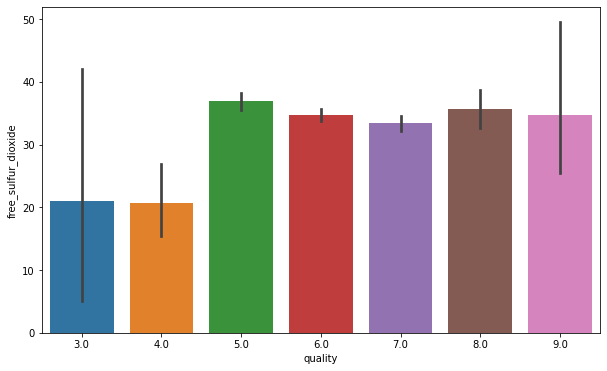

In [91]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free_sulfur_dioxide', data = new_data)

# Total Sulfur Dioxide Vs Quality

<AxesSubplot:xlabel='quality', ylabel='total_sulfur_dioxide'>

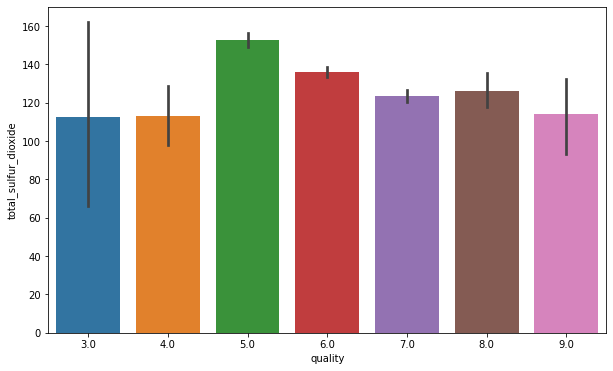

In [92]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total_sulfur_dioxide', data = new_data)

# Sulphates vs Quality

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

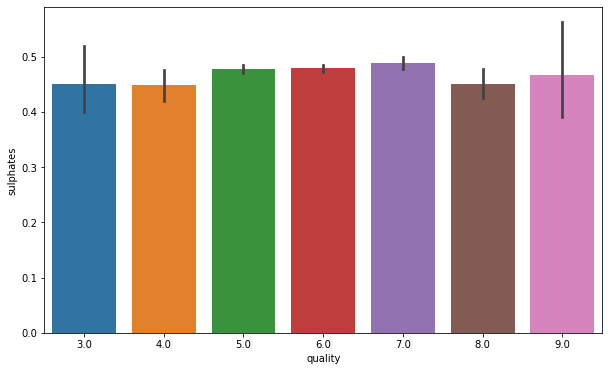

In [93]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = new_data)

# Density vs Quality

<AxesSubplot:xlabel='quality', ylabel='density'>

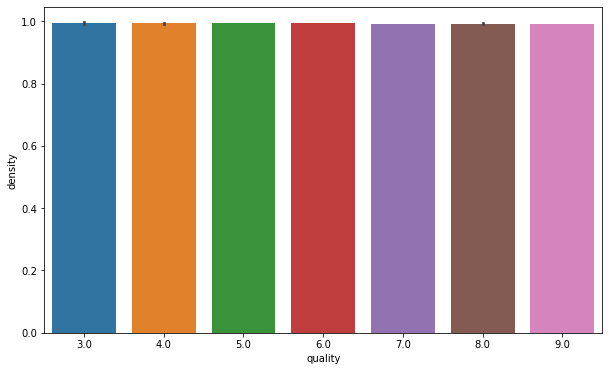

In [94]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'density', data = new_data)

# pH vs Quality

<AxesSubplot:xlabel='quality', ylabel='pH'>

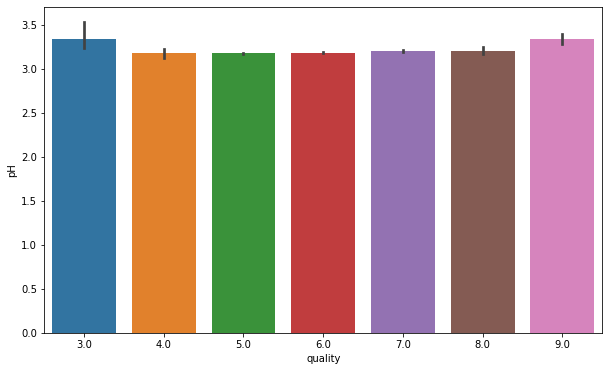

In [95]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'pH', data = new_data)

# Chloride vs Quality

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

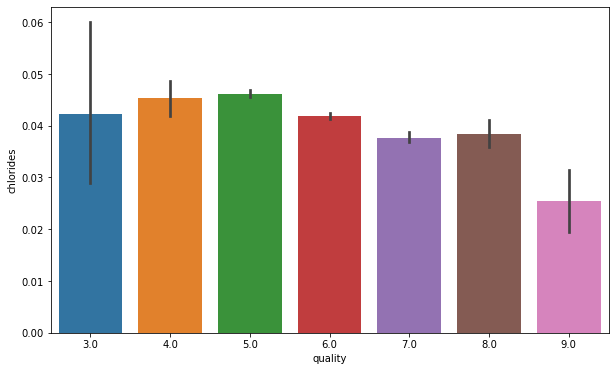

In [96]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = new_data)

# Here we can see that like the above two items do not have very strong relation to the dependent variable we have to showcase a correlation plot to check which of the items are more related to the dependent variable and which items are less related to the dependent variables.

# Answer 5:

# Finding the correlation between the quality of wine with other variables

<AxesSubplot:>

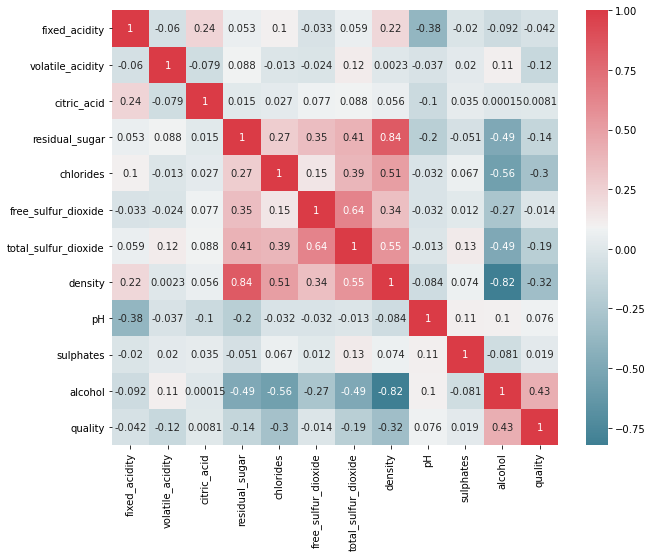

In [97]:
corr = new_data.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True))

# Getting Rid of the Highly Co-related Features

In [98]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [99]:
corr_features = correlation(new_data, 0.7)
len(set(corr_features))

2

In [100]:
corr_features

{'alcohol', 'density'}

In [101]:
new_data = new_data.drop(['alcohol', 'density'], axis = 1)

In [102]:
corr['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.428904
pH                      0.076051
sulphates               0.018850
citric_acid             0.008077
free_sulfur_dioxide    -0.014137
fixed_acidity          -0.042424
volatile_acidity       -0.123627
residual_sugar         -0.138436
total_sulfur_dioxide   -0.193525
chlorides              -0.297823
density                -0.320202
Name: quality, dtype: float64

From the above correlation plot for the given dataset for wine quality prediction, we can easily see which items are related strongly with each other and which items are related weekly with each other.

The strongly correlated items are :

1. alcohol and quality
2. fixed acidity and citric acid
3. free sulphur dioxide and total sulphor dioxide
4. fixed acidity and density
5. Residual Sugar and Density

   
<!-- so, from above points there is a clear inference that alcohol is the most important characteristic to determine the quality of wine.

The weekly correlated items are :

1. citric acid and volatile acidity.
2. fixed acidity and ph.
3. density and alcohol.
4. residual sugar and alcohol
5. chloride and alcohol
6. density and alcohol
7. quality and density

These are some relations which do not depend on each other at all. -->


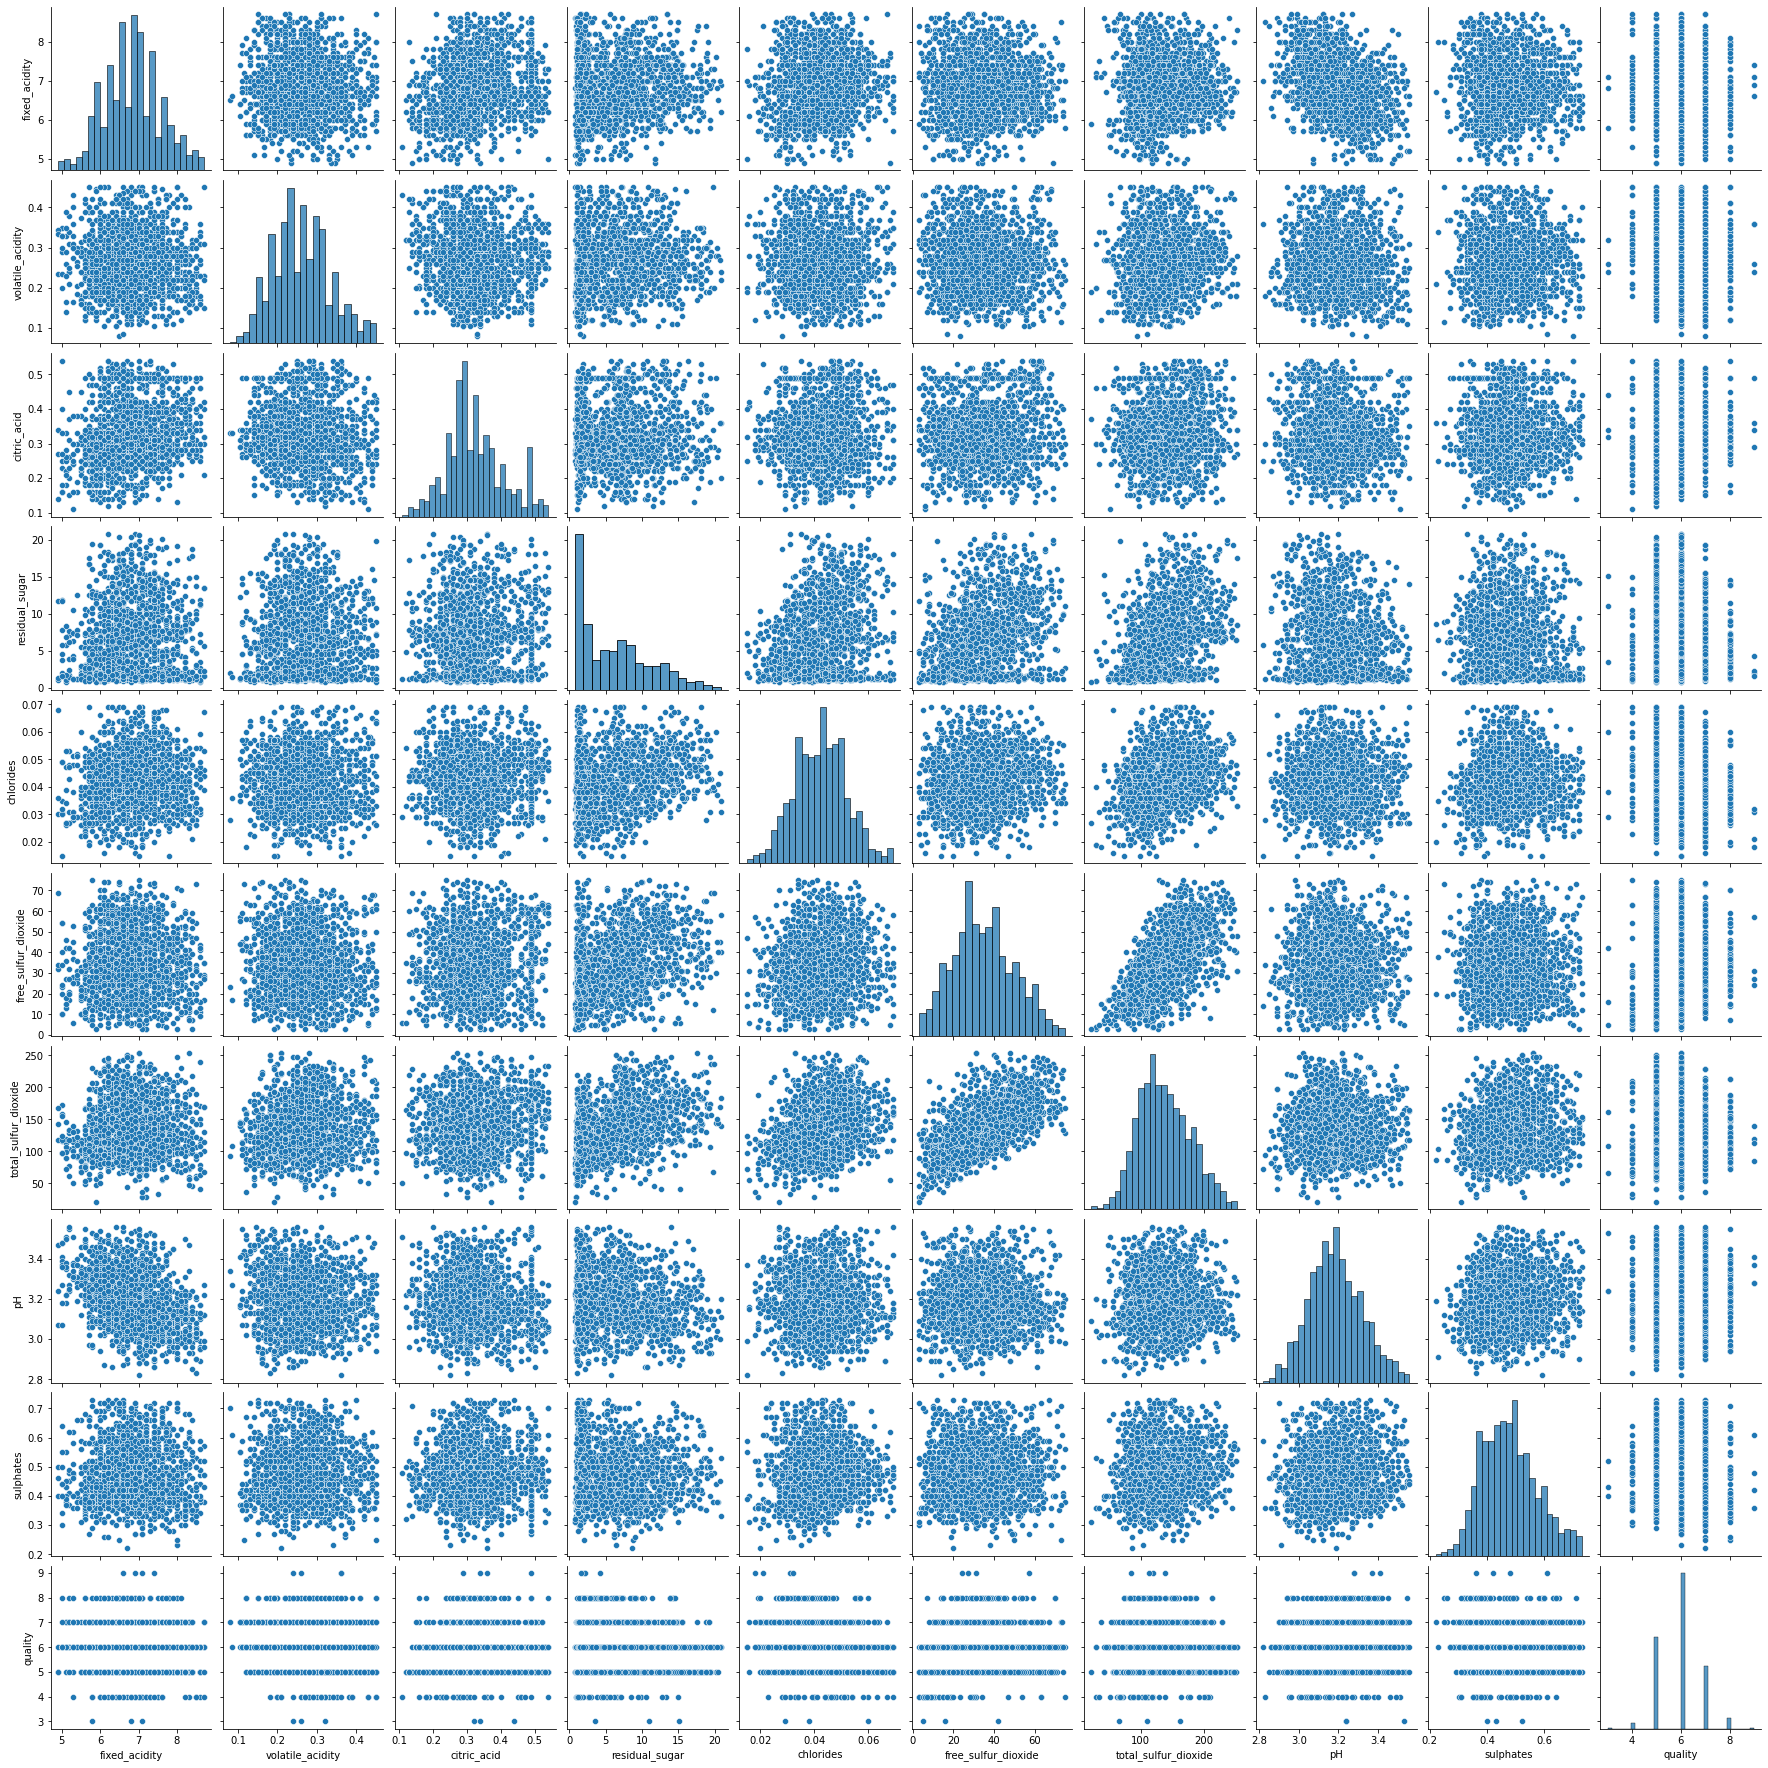

In [103]:
sns.pairplot(new_data)

In [104]:
# checking the shape of the dataset
print(new_data.shape)

(1905, 10)


In [105]:
new_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,pH,sulphates,quality
0,7.5,0.33,0.32,11.1,0.036,25.0,119.0,3.15,0.34,6.0
1,6.3,0.27,0.29,12.2,0.044,59.0,196.0,3.14,0.40,6.0
2,7.0,0.30,0.51,13.6,0.050,40.0,168.0,3.07,0.52,7.0
3,7.4,0.38,0.27,7.5,0.041,24.0,160.0,3.17,0.43,5.0
5,6.6,0.20,0.38,7.9,0.052,30.0,145.0,3.32,0.56,7.0


# Labelling using Certain Condition

Now, Let's reallocate the quality of wine as 0: 0 to 5 (Average quality) and 1: 6 to 10 (Good quality) from existing 'quality' variable.
    # 0 to 5 (Average quality)
    # 1: 6 to 10 (Good quality)

In [106]:
new_data['quality'] = [0 if x <= 5 else 1 for x in new_data['quality']]

In [107]:
new_data['quality'].value_counts()

1    1332
0     573
Name: quality, dtype: int64

In [108]:
new_data['quality'] = new_data['quality'].map({0:'Average', 1:'Good'})

In [109]:
new_data['quality'].value_counts()

Good       1332
Average     573
Name: quality, dtype: int64

In [110]:
new_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,pH,sulphates,quality
0,7.5,0.33,0.32,11.1,0.036,25.0,119.0,3.15,0.34,Good
1,6.3,0.27,0.29,12.2,0.044,59.0,196.0,3.14,0.40,Good
2,7.0,0.30,0.51,13.6,0.050,40.0,168.0,3.07,0.52,Good
3,7.4,0.38,0.27,7.5,0.041,24.0,160.0,3.17,0.43,Average
5,6.6,0.20,0.38,7.9,0.052,30.0,145.0,3.32,0.56,Good


# Label Encoding on Categorical Values

In [111]:
# converting the probable categorical value into binary form for ease of operation
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder() 
new_data['quality'] = lb.fit_transform(new_data['quality'])
print(new_data['quality'])

0       1
1       1
2       1
3       0
5       1
       ..
2032    1
2033    1
2034    1
2035    0
2036    1
Name: quality, Length: 1905, dtype: int32


C:\Users\manoj\anaconda3\envs\juds\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='quality', ylabel='count'>

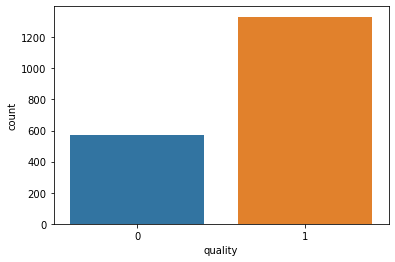

In [112]:
sns.countplot(new_data['quality'])

# Checking Processed DataSet Status

In [113]:
new_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,pH,sulphates,quality
0,7.5,0.33,0.32,11.1,0.036,25.0,119.0,3.15,0.34,1
1,6.3,0.27,0.29,12.2,0.044,59.0,196.0,3.14,0.40,1
2,7.0,0.30,0.51,13.6,0.050,40.0,168.0,3.07,0.52,1
3,7.4,0.38,0.27,7.5,0.041,24.0,160.0,3.17,0.43,0
5,6.6,0.20,0.38,7.9,0.052,30.0,145.0,3.32,0.56,1


# Selecting Dependent and Independent Variable

In [114]:
#Choossing the independent variable X and the dependent variable Y
x = new_data.iloc[:, 0:-1] 
y = new_data.iloc[:, -1] 


In [115]:
x

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,pH,sulphates
0,7.5,0.33,0.32,11.1,0.036,25.0,119.0,3.15,0.34
1,6.3,0.27,0.29,12.2,0.044,59.0,196.0,3.14,0.40
2,7.0,0.30,0.51,13.6,0.050,40.0,168.0,3.07,0.52
3,7.4,0.38,0.27,7.5,0.041,24.0,160.0,3.17,0.43
5,6.6,0.20,0.38,7.9,0.052,30.0,145.0,3.32,0.56
...,...,...,...,...,...,...,...,...,...
2032,8.1,0.34,0.28,7.5,0.040,70.0,230.0,3.14,0.55
2033,7.4,0.19,0.31,14.5,0.045,39.0,193.0,3.10,0.50
2034,6.7,0.36,0.26,7.9,0.034,39.0,123.0,2.99,0.30
2035,7.7,0.28,0.35,15.3,0.056,31.0,117.0,3.27,0.50


In [116]:
y

0       1
1       1
2       1
3       0
5       1
       ..
2032    1
2033    1
2034    1
2035    0
2036    1
Name: quality, Length: 1905, dtype: int32

# Answer 6:

Not able to identify appropriate mean and proportion tests. (Lack of Hypothesis Knowledge)

# Answer 7:

In [ ]:
# Shapiro-Wilk Normality Test
# ###### H0: the sample has a Gaussian / Normal distribution.
# ###### H1: the sample does not have a Gaussian distribution.
# from scipy.stats import shapiro
# import pandas as pd
# df = pd.read_csv('.csv')
# stat, p = shapiro(df['axil_nodes'])
# stat, p = shapiro(df['operation_year'])
# stat, p = shapiro(df['age'])
# print('stat=%.4f, p=%.4f' % (stat, p))
# ### p_value < 0.05 , H0 will be rejected
# if p < 0.05:
#         print('Probably the sample is not Normal')
# else:
#         print('Probably the sample is Normal')


In [127]:
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.5,0.33,0.32,11.1,0.036,25.0,119.0,0.99620,3.15,0.34,10.5,6
1,6.3,0.27,0.29,12.2,0.044,59.0,196.0,0.99782,3.14,0.40,8.8,6
2,7.0,0.30,0.51,13.6,0.050,40.0,168.0,0.99760,3.07,0.52,9.6,7
3,7.4,0.38,0.27,7.5,0.041,24.0,160.0,0.99535,3.17,0.43,10.0,5
4,8.1,0.12,0.38,0.9,0.034,36.0,86.0,0.99026,2.80,0.55,12.0,6


In [130]:
df['fixed.acidity'].mean

<bound method Series.mean of 0       7.5
1       6.3
2       7.0
3       7.4
4       8.1
       ... 
2032    8.1
2033    7.4
2034    6.7
2035    7.7
2036    5.7
Name: fixed.acidity, Length: 2037, dtype: float64>

In [ ]:
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(df['age'], x2=None, value=50)
print(pval)
print('p-value of Z Test =',pval)

# statsmodels OLS Model

In [117]:
linearmodel = sm.OLS(y, x).fit()
print(linearmodel.summary2())

                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.731    
Dependent Variable:     quality          AIC:                         2230.9462
Date:                   2022-01-25 23:18 BIC:                         2280.9163
No. Observations:       1905             Log-Likelihood:              -1106.5  
Df Model:               9                F-statistic:                 576.7    
Df Residuals:           1896             Prob (F-statistic):          0.00     
R-squared (uncentered): 0.732            Scale:                       0.18797  
---------------------------------------------------------------------------------
                        Coef.    Std.Err.      t      P>|t|     [0.025     0.975]
---------------------------------------------------------------------------------
fixed_acidity           0.0352     0.0122    2.8876   0.0039     0.0113    0.0590
volatile_acidity       -0.8510     0.1393   -6.1091   0.

In [118]:
print(linearmodel.summary())

                                 OLS Regression Results                                
Dep. Variable:                quality   R-squared (uncentered):                   0.732
Model:                            OLS   Adj. R-squared (uncentered):              0.731
Method:                 Least Squares   F-statistic:                              576.7
Date:                Tue, 25 Jan 2022   Prob (F-statistic):                        0.00
Time:                        23:18:27   Log-Likelihood:                         -1106.5
No. Observations:                1905   AIC:                                      2231.
Df Residuals:                    1896   BIC:                                      2281.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

# OLS Model By Adding Costant

In [119]:
X= sm.add_constant(x)

In [120]:
linearmodel2 = sm.OLS(y, X).fit()

In [121]:
print(linearmodel2.summary2())

                   Results: Ordinary least squares
Model:                OLS               Adj. R-squared:      0.111    
Dependent Variable:   quality           AIC:                 2222.2099
Date:                 2022-01-25 23:18  BIC:                 2277.7323
No. Observations:     1905              Log-Likelihood:      -1101.1  
Df Model:             9                 F-statistic:         27.49    
Df Residuals:         1895              Prob (F-statistic):  3.92e-45 
R-squared:            0.115             Scale:               0.18701  
----------------------------------------------------------------------
                      Coef.   Std.Err.    t    P>|t|   [0.025   0.975]
----------------------------------------------------------------------
const                  1.0438   0.3190  3.2726 0.0011   0.4183  1.6694
fixed_acidity          0.0052   0.0152  0.3433 0.7314  -0.0246  0.0350
volatile_acidity      -0.9441   0.1418 -6.6567 0.0000  -1.2222 -0.6659
citric_acid           -0.0

In [122]:
print(linearmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     27.49
Date:                Tue, 25 Jan 2022   Prob (F-statistic):           3.92e-45
Time:                        23:18:27   Log-Likelihood:                -1101.1
No. Observations:                1905   AIC:                             2222.
Df Residuals:                    1895   BIC:                             2278.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.0438 

# statsmodels Logit Model

In [123]:
logitmodel=sm.Logit(y,x)
result=logitmodel.fit()
print(result.summary2() )

Optimization terminated successfully.
         Current function value: 0.551674
         Iterations 6
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.098     
Dependent Variable:   quality            AIC:                2119.8764 
Date:                 2022-01-25 23:18   BIC:                2169.8466 
No. Observations:     1905               Log-Likelihood:     -1050.9   
Df Model:             8                  LL-Null:            -1165.0   
Df Residuals:         1896               LLR p-value:        7.6436e-45
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       6.0000                                           
-----------------------------------------------------------------------
                      Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
-----------------------------------------------------------------------
fixed_acidity          0.0957   0.0665  1.4384 0.1503  -0.0347 

In [124]:
print(result.summary() )

                           Logit Regression Results                           
Dep. Variable:                quality   No. Observations:                 1905
Model:                          Logit   Df Residuals:                     1896
Method:                           MLE   Df Model:                            8
Date:                Tue, 25 Jan 2022   Pseudo R-squ.:                 0.09788
Time:                        23:18:27   Log-Likelihood:                -1050.9
converged:                       True   LL-Null:                       -1165.0
Covariance Type:            nonrobust   LLR p-value:                 7.644e-45
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed_acidity            0.0957      0.067      1.438      0.150      -0.035       0.226
volatile_acidity        -4.7681      0.754     -6.327      0.000      -6.245      -3.291
citric_acid 

# Statsmodel Logit Model By Adding Constant

In [125]:
X= sm.add_constant(x)
logitmodel2=sm.Logit(y,X)
result2=logitmodel2.fit()
print(result2.summary2() )

Optimization terminated successfully.
         Current function value: 0.550926
         Iterations 6
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.099     
Dependent Variable:   quality            AIC:                2119.0292 
Date:                 2022-01-25 23:18   BIC:                2174.5515 
No. Observations:     1905               Log-Likelihood:     -1049.5   
Df Model:             9                  LL-Null:            -1165.0   
Df Residuals:         1895               LLR p-value:        1.0633e-44
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       6.0000                                           
-----------------------------------------------------------------------
                      Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
-----------------------------------------------------------------------
const                  2.8901   1.7140  1.6861 0.0918  -0.4693 

In [126]:
print(result2.summary2() )

                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.099     
Dependent Variable:   quality            AIC:                2119.0292 
Date:                 2022-01-25 23:18   BIC:                2174.5515 
No. Observations:     1905               Log-Likelihood:     -1049.5   
Df Model:             9                  LL-Null:            -1165.0   
Df Residuals:         1895               LLR p-value:        1.0633e-44
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       6.0000                                           
-----------------------------------------------------------------------
                      Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
-----------------------------------------------------------------------
const                  2.8901   1.7140  1.6861 0.0918  -0.4693   6.2495
fixed_acidity          0.0144   0.0822  0.1749 0.8611  -0.1467   0.1755
volatile_acidity     

# Answer 8: 

In this project, I have tried to implement WINE QUALITY Predictor model. First I have preprocessed the data. Cleaned the data by outlier removal. Then analyzed the Corelated variables. Then I carefully analyzed my Dependent & Independent variables. Then applied Logistic Regression methodology in my Data. I used Logistic Regression Logit & OLS model. I found R-squared (uncentered) value for OLS Linear Model at a good acceptance level. (Not sure about uncentered R square value good or not). I am not also sure what to do with p values of nearly 1. I have some confusion in choosing a perfect model for linear regression.
Expert Feedback needed.

Submitted To -
Dr. Rumana Rois
Associate Professor, Department of Statistics, 
Jahangirnagar University

Submitted By - 
Manoj Roy |
ID: 20216039 |
PMASDS(6th Batch) |

Code Link : https://github.com/mchayan/DS_Practice/blob/master/EDA_Practice/Assignment/Assignment_2.ipynb
